In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive = '/content/drive/MyDrive/cmplg-xml'
import glob
files = glob.glob(drive+'/*.xml')

In [3]:
files[94]

'/content/drive/MyDrive/cmplg-xml/9604004.xml'

In [4]:
import pandas as pd
from bs4 import BeautifulSoup

def Split_Data(file):
  soup = BeautifulSoup(open(file),'xml')
  a = soup.find('ABSTRACT').text
  b =  soup.get_text()
  c = b.replace(a, '####')
  return c.split('####')[1], a


def Dataset(files, fn):
  article = []
  summary = []
  for file in files:
    a, b = fn(file)
    article.append(a)
    summary.append(b)
  df = pd.DataFrame({'Articles':article, 'Summary':summary})
  return df

data = Dataset(files, Split_Data)

In [23]:
data

,Articles,Summary
0,\n\n Introduction \n\n The formalism of synch...,\n\nThe formalism of synchronous tree-adjoinin...
1,\n\n Theoretical Background \n\nAs a prelimin...,\n\nWe present an analysis of the semantic int...
2,\n\n Introduction \n\nIn computational lexico...,\n\nCurrent approaches to computational lexico...
3,\n\n INTRODUCTION \n\nGeneral-purpose natura...,\n\nThe paper demonstrates that exponential co...
4,\n\n Introduction \n\nPsycholinguistic knowle...,\n\nWe introduce the bilingual dual-coding the...
...,...,...
173,\n\n Introduction \n\n For an agent to be ab...,\n\nIf an agent does not possess the knowledge...
174,\n\n Introduction \n\nWithin the cooperative ...,\n\nThis paper focuses on two disparate aspect...
175,\n\n Introduction \n\nTyped feature structure...,\n\nThis paper describes an abstract machine f...
176,\n\n Introduction \n\nThis work is part of an...,\n\nWe describe an approach to robust domain-i...


In [6]:
train = data[:110]
test = data[110:]

In [7]:
test

,Articles,Summary
110,\n\n Introduction \n\nRecent years have seen ...,\n\nThis paper presents a grammar formalism de...
111,\n\n Introduction \n\nAlthough a universal fe...,\n\nThe recognition problem for attribute-valu...
112,"\n\n Introduction \n\nRecently, there has bee...","\n\nIn this paper, we assess the complexity re..."
113,\n\n Introduction \n\nCompositionality is def...,\n\nWe prove a theorem stating that any semant...
114,\n\n Introduction \n\nA number of researchers...,\n\nWe conducted an empirical analysis into th...
...,...,...
173,\n\n Introduction \n\n For an agent to be ab...,\n\nIf an agent does not possess the knowledge...
174,\n\n Introduction \n\nWithin the cooperative ...,\n\nThis paper focuses on two disparate aspect...
175,\n\n Introduction \n\nTyped feature structure...,\n\nThis paper describes an abstract machine f...
176,\n\n Introduction \n\nThis work is part of an...,\n\nWe describe an approach to robust domain-i...


In [8]:
train_data = []
for i in range(len(train)):
  ar = train['Articles'][i]
  su = train['Summary'][i]
  train_data.append([ar,su])

test_data = []
for j in range(110, len(data)):
  ar = test['Articles'][j]
  su = test['Summary'][j]
  test_data.append([ar,su])


In [9]:
test['Articles'][111]

"\n\n  Introduction \n\nAlthough a universal feature theory does not exist, there is\na general understanding of its objects. The objects of feature\ntheories are abstract linguistic objects, e.g., an object ``sentence,''\nan object ``masculine third person singular,'' an object ``verb,'' an\nobject ``noun phrase.'' These abstract objects have properties like\n``tense,'' ``number,'' ``predicate,'' ``subject.''\nThe values of these properties\nare either atomic, like ``present'' and ``singular,'' or abstract\nobjects, like ``verb'' and ``noun-phrase.''\nThe abstract objects are fully described by their properties and\ntheir values. Multiple descriptions for the properties and values\nof the abstract linguistic objects are presented in the literature.\nExamples are:\n\n\n1.\nFeature graphs, which are labeled rooted directed acyclic graphs\nG=(V,A), where\nF is a collection of labels,\na sink\nin the graph represents an atomic value and the labeling function\nis an injective function \n\n

In [10]:
test_data

[["\n\n  Introduction \n\nRecent years have seen a resurgence of interest in\nprobabilistic techniques for automatic language analysis. In\nparticular, there has arisen a distinct paradigm of processing on the basis of\npre-analyzed data which has taken the name   Data-Oriented Parsing.\n\n\n``Data Oriented Parsing (DOP) is a model where no abstract rules, but\nlanguage experiences in the form of an analyzed corpus, constitute the\n basis for language processing.'' \n\n\nThere is not space here to present full justification for\nadopting such an approach or to detail the advantages that it\noffers. The main claim it makes is that effective language processing requires\na consideration of both the structural and statistical aspects of\nlanguage, whereas traditional competence grammars rely only on the\nformer, and standard  statistical techniques such as n-gram models\nonly on the latter.  DOP attempts to combine\nthese two traditions and produce ``performance grammars'', which:\n\n\n``

In [11]:
!pip install sentencepiece
!pip install transformers

     |████████████████████████████████| 1.2MB 8.1MB/s 
     |████████████████████████████████| 2.3MB 7.8MB/s 
     |████████████████████████████████| 901kB 52.6MB/s 
     |████████████████████████████████| 3.3MB 42.4MB/s 


In [12]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch
import transformers
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_name = 'google/pegasus-arxiv'
tokenizer_pegasus = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)



```
tokenized_train_data = []
for idx in range(len(train_data)):
  art = tokenizer.encode(train['Articles'][idx], truncation=True, return_tensors="pt").to(torch_device)
  summ = tokenizer.encode(train_data['Summary'][idx], max_length=100,  truncation=True, return_tensors="pt").to(torch_device)
  tokenized_train_data.append([art,summ])

tokenized_test_data = []
for idx in range(110, len(data)):
  art = tokenizer.encode(test_data['Articles'][idx], truncation=True, return_tensors="pt").to(torch_device)
  summ = tokenizer.encode(test_data['Summary'][idx], max_length=100,  truncation=True, return_tensors="pt").to(torch_device)
  tokenized_test_data.append([art,summ])
```



In [13]:
tokenized_train_data = []
for idx in range(len(train)):
  art = tokenizer_pegasus.encode(train['Articles'][idx], truncation=True, return_tensors="pt").to(torch_device)
  summ = tokenizer_pegasus.encode(train['Summary'][idx], max_length=100,  truncation=True, return_tensors="pt").to(torch_device)
  tokenized_train_data.append([art,summ])
 
tokenized_test_data = []
for idx in range(110, len(data)):
  art = tokenizer_pegasus.encode(test['Articles'][idx], truncation=True, return_tensors="pt").to(torch_device)
  summ = tokenizer_pegasus.encode(test['Summary'][idx], max_length=100,  truncation=True, return_tensors="pt").to(torch_device)
  tokenized_test_data.append([art,summ])

In [14]:
for ipt, lbl in tokenized_test_data:
  print(ipt.shape)

torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size([1, 1024])
torch.Size

In [15]:
import tensorflow as tf
from statistics import mean
import numpy as np

In [16]:
def train_simple_network(mdl, loss_func, train_loader, tok, spacy_tok, vcb, val_loader=None, score_funcs=None, epochs=10, device="cuda", checkpoint_file=None, lr=0.001):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    """
    if score_funcs == None:
        score_funcs = {}#Empty set 
    
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    # Adafactor optimizer - Built and optimized upon Adam
    optimizer = transformers.Adafactor(mdl.parameters())

    #Place the model on the correct compute resource (CPU or GPU)
    mdl.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        mdl = mdl.train()#Put our model in training mode
        running_loss = 0.0
        
        # y_true = []
        # y_pred = []
        bleu = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):

            src = tok.encode(inputs, truncation=True, return_tensors="pt").to(torch_device)
            tar = tok.encode(labels, max_length=100, truncation=True, return_tensors="pt").to(torch_device)
      
            #Move the batch to the device we are using. 
            inputs = src.to(device)
            labs = tar.to(device)
            
            #batch_size = labels.shape[0]
            max_length_labels = labs.shape[1]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            y_hat = mdl.generate(inputs, max_length=max_length_labels) #this just computed f_Θ(x(i))
            y_hat1 = tf.one_hot(y_hat.detach().cpu(), len(vcb))
            y_hat1 = torch.tensor(y_hat1.numpy(),requires_grad=True).squeeze(0).to(device)
            # max_length_inputs = y_hat1.shape[0]
            shape = y_hat1.shape[0]

            print(y_hat1.shape)
            # tar_1 = tok.encode(labels, max_length=max_length_inputs, truncation=True, return_tensors="pt").to(torch_device)
            # labels_1 = tar_1.to(device)
            print(labs.squeeze(0).shape)
            
            # if max_length_inputs == max_length_labels:
            #     labl = labs
            # else:
            #     labl = labels_1

            if shape == max_length_labels:
                n1 = 'None'
            else:
                labs = labs[0][:shape]

            # Compute loss.
            loss = loss_func(y_hat1, labs.squeeze(0))

            loss.backward()

            #Now we just need to update all the parameters! 
            optimizer.step()

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() #* batch_size
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labs = labs.detach().cpu().numpy()
            y_hat1 = y_hat1.detach().cpu().numpy()
            # decoded_pred = tok.batch_decode(y_hat1, skip_special_tokens=True)[0]
            # decoded_labels = tok.batch_decode(labs, skip_special_tokens=True)[0]

            # for name, score_func in score_funcs.items():
            #   bleu.append(score_func(spacy_tok(decoded_pred),spacy_tok(decoded_labels)))
            #   name = name


            # for i in range(batch_size):
            #     y_true.append(labels[i])
            #     y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        # y_pred = np.asarray(y_pred)
        
        # if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
        #     y_pred = np.argmax(y_pred, axis=1)
        # results["train " + name].append(mean(bleu))
        # for name, score_func in score_funcs.items():
        #     results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            mdl = mdl.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            # y_true = []
            # y_pred = []
            bleu = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:

                src = tok.encode(inputs, truncation=True, return_tensors="pt").to(torch_device)
                tar = tok.encode(labels, max_length=100, truncation=True, return_tensors="pt").to(torch_device)
        
                #Move the batch to the device we are using. 
                inputs = src.to(device)
                labs = tar.to(device)
                
                # batch_size = labels.shape[0]
                max_length_labels = labs.shape[1]
        
                y_hat = mdl.generate(inputs, max_length=max_length_labels)
                y_hat1 = tf.one_hot(y_hat.detach().cpu(), len(vcb))
                y_hat1 = torch.tensor(y_hat1.numpy(), requires_grad=True).squeeze(0).to(device)
                shape = y_hat1.shape[0]

                # max_length_inputs = y_hat1.shape[0]

                # tar_1 = tok.encode(labels, max_length=max_length_inputs, truncation=True, return_tensors="pt").to(torch_device)
                # labels_1 = tar_1.to(device)
                # if max_length_inputs == max_length_labels:
                #     labl = labs
                # else:
                #     labl = labels_1
                if shape == max_length_labels:
                    n1 = 'None'
                else:
                    labs = labs[0][:shape]

                loss = loss_func(y_hat1, labs.squeeze(0))
                # labels = tar.to(device)
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() #* batch_size

                #moving labels & predictions back to CPU for computing / storing predictions
                labs = labs.detach().cpu().numpy()
                y_hat1 = y_hat1.detach().cpu().numpy()

                # decoded_pred = tok.batch_decode(y_hat1, skip_special_tokens=True)[0]
                # decoded_labels = tok.batch_decode(labs, skip_special_tokens=True)[0]

                # for name, score_func in score_funcs.items():
                #     bleu.append(score_func(spacy_tok(decoded_pred),spacy_tok(decoded_labels)))
                #     name = name
                # for i in range(batch_size):
                #     y_true.append(labels[i])
                #     y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            # y_pred = np.asarray(y_pred)

            # if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            #     y_pred = np.argmax(y_pred, axis=1)
            
            # results["val " + name].append(mean(bleu))

            # for name, score_func in score_funcs.items():
            #     results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [17]:
import torch.nn as nn
from tqdm import tqdm
import time
import spacy
eng_words = spacy.load('en')
def tokenize_words(text):
  return [tok.text for tok in eng_words.tokenizer(text)]
from nltk.translate.bleu_score import sentence_bleu
import spacy
import numpy as np
# eng_words = spacy.load('en')
# def tokenize_words(text):
#   return [tok.text for tok in eng_words.tokenizer(text)]
criterion = nn.CrossEntropyLoss()
score_funcs = {'BLEU':sentence_bleu}
results_df = train_simple_network(mdl=model, loss_func=criterion, train_loader=train_data, spacy_tok=tokenize_words, val_loader=test_data, tok=tokenizer_pegasus, vcb = tokenizer_pegasus.get_vocab())

Train Batch:   1%|          | 1/110 [00:08<14:32,  8.00s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:10<11:38,  6.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:13<09:34,  5.37s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:15<07:43,  4.37s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:16<05:59,  3.43s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:19<05:34,  3.22s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:22<05:10,  3.02s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:25<05:01,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:27<04:52,  2.90s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:30<04:44,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:33<04:43,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:36<04:32,  2.78s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:38<04:13,  2.62s/it]

torch.Size([34, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:41<04:17,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:43<04:18,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:46<04:17,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:49<04:08,  2.67s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:51<04:04,  2.65s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:54<03:50,  2.53s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:56<03:54,  2.61s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:59<03:57,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [01:02<03:59,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:05<03:59,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:08<03:58,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:10<03:46,  2.66s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:12<03:36,  2.58s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:15<03:34,  2.59s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:18<03:39,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:21<03:41,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:24<03:41,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:26<03:29,  2.65s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:29<03:31,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:31<03:10,  2.47s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:33<03:02,  2.41s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:35<02:55,  2.34s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:37<02:40,  2.16s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:39<02:30,  2.06s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:41<02:39,  2.21s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:44<02:49,  2.39s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:47<02:46,  2.38s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:49<02:54,  2.52s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:52<02:58,  2.63s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:55<02:59,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:58<03:00,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:01<03:00,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:03<02:46,  2.61s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:05<02:34,  2.45s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:08<02:39,  2.57s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:11<02:42,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:14<02:43,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:17<02:43,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:19<02:42,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:22<02:42,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:25<02:39,  2.85s/it]

torch.Size([66, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:28<02:36,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:31<02:34,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:34<02:32,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:36<02:23,  2.75s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:39<02:23,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:42<02:16,  2.73s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:45<02:16,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:48<02:15,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:51<02:15,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:54<02:13,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:56<02:08,  2.85s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:00<02:19,  3.16s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:03<02:11,  3.05s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:06<02:06,  3.02s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:09<01:58,  2.88s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:11<01:55,  2.88s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:14<01:46,  2.73s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:17<01:44,  2.76s/it]

torch.Size([34, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:19<01:35,  2.59s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:21<01:33,  2.59s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:24<01:34,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:27<01:34,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:30<01:25,  2.60s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:32<01:25,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:35<01:18,  2.55s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:38<01:19,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:40<01:19,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:43<01:14,  2.65s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:44<01:00,  2.26s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:47<01:03,  2.46s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:49<00:59,  2.38s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:52<01:00,  2.53s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:55<01:01,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [03:57<00:53,  2.43s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:00<00:52,  2.50s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:03<00:52,  2.63s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:05<00:49,  2.63s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:08<00:49,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:11<00:46,  2.73s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:13<00:42,  2.65s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:16<00:41,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:19<00:38,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:22<00:36,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:24<00:31,  2.59s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:27<00:27,  2.53s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:29<00:23,  2.39s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:30<00:19,  2.19s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:33<00:19,  2.40s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:36<00:18,  2.57s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:39<00:16,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:41<00:12,  2.47s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:44<00:09,  2.43s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:46<00:07,  2.53s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:49<00:05,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:52<00:02,  2.66s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:54<00:00,  2.40s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:17,  2.91s/it]

torch.Size([36, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:14,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:12,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:10<04:44,  2.68s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<03:58,  2.27s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:15,  2.46s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:17<04:21,  2.54s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:31,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:35,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:38,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:40,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:34,  2.80s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:20,  2.68s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:23,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:26,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:26,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:18,  2.78s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:48<04:12,  2.75s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<03:59,  2.63s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:53<04:04,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:56<04:04,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [00:59<04:07,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:02<04:08,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:05<04:08,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:54,  2.76s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:10<03:43,  2.67s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:13<03:42,  2.68s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:16<03:45,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:19<03:47,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:22<03:48,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:24<03:35,  2.73s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:27<03:37,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:29<03:14,  2.53s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:31<03:08,  2.48s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:34<03:00,  2.41s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:35<02:45,  2.24s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:37<02:36,  2.14s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:40<02:44,  2.28s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:43<02:53,  2.45s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:45<02:51,  2.45s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:48<02:58,  2.59s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:51<03:02,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:54<03:03,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:57<03:04,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:00<03:04,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:02<02:50,  2.67s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:04<02:37,  2.50s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:07<02:43,  2.63s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:10<02:46,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:13<02:47,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:16<02:46,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:19<02:45,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:22<02:44,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:25<02:42,  2.90s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:28<02:39,  2.90s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:31<02:37,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:33<02:35,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:36<02:26,  2.81s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:39<02:25,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:42<02:18,  2.77s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:44<02:18,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:47<02:16,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:50<02:17,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:53<02:14,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:56<02:09,  2.88s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:00<02:20,  3.18s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:03<02:12,  3.09s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:06<02:08,  3.05s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:09<01:59,  2.92s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:11<01:56,  2.91s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:14<01:47,  2.75s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:17<01:45,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:19<01:36,  2.61s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:21<01:33,  2.60s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:24<01:34,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:27<01:34,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:30<01:25,  2.61s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:32<01:26,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:35<01:19,  2.56s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:38<01:20,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:41<01:19,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:43<01:14,  2.66s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:44<01:01,  2.26s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:47<01:04,  2.46s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:49<00:59,  2.37s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:52<01:00,  2.54s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:55<01:01,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [03:57<00:53,  2.43s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:00<00:52,  2.51s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:03<00:52,  2.63s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:05<00:49,  2.63s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:08<00:48,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:11<00:46,  2.71s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:13<00:42,  2.63s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:16<00:40,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:19<00:39,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:22<00:36,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:24<00:31,  2.61s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:27<00:27,  2.54s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:29<00:23,  2.40s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:31<00:19,  2.19s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:33<00:19,  2.40s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:36<00:17,  2.57s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:39<00:16,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:41<00:12,  2.47s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:44<00:09,  2.42s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:46<00:07,  2.52s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:49<00:05,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:52<00:02,  2.65s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:54<00:00,  2.38s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:20,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:15,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:13,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:10<04:46,  2.70s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<03:59,  2.28s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:15,  2.46s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:17<04:21,  2.54s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:31,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:37,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:39,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:41,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:32,  2.78s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:17,  2.66s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:22,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:26,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:27,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:18,  2.78s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:48<04:14,  2.77s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<04:00,  2.64s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:04,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:56<04:05,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [00:59<04:08,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:02<04:08,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:05<04:06,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:54,  2.76s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:10<03:43,  2.66s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:13<03:41,  2.67s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:16<03:45,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:19<03:46,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:22<03:47,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:24<03:34,  2.71s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:27<03:36,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:29<03:14,  2.52s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:31<03:06,  2.46s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:33<02:59,  2.39s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:35<02:44,  2.22s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:37<02:35,  2.13s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:40<02:43,  2.28s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:43<02:55,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:45<02:52,  2.47s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:48<02:59,  2.60s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:51<03:03,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:54<03:04,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:57<03:05,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:00<03:05,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:02<02:51,  2.68s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:04<02:37,  2.50s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:07<02:42,  2.63s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:10<02:45,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:13<02:46,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:16<02:46,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:19<02:45,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:22<02:44,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:25<02:42,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:28<02:39,  2.90s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:31<02:37,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:33<02:34,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:36<02:25,  2.80s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:39<02:25,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:42<02:19,  2.78s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:45<02:18,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:47<02:16,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:50<02:17,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:53<02:14,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:56<02:10,  2.89s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:00<02:20,  3.20s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:03<02:13,  3.11s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:06<02:08,  3.07s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:09<01:59,  2.93s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:11<01:56,  2.91s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:14<01:47,  2.76s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:17<01:46,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:19<01:36,  2.62s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:22<01:34,  2.61s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:25<01:35,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:27<01:34,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:30<01:26,  2.61s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:33<01:26,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:35<01:19,  2.57s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:38<01:20,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:41<01:19,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:43<01:14,  2.67s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:45<01:01,  2.27s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:47<01:04,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:50<00:59,  2.39s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:53<01:01,  2.55s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:56<01:01,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [03:57<00:53,  2.44s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:00<00:52,  2.51s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:03<00:53,  2.65s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:06<00:50,  2.64s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:09<00:49,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:11<00:46,  2.73s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:14<00:42,  2.64s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:17<00:40,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:20<00:39,  2.79s/it]

torch.Size([81, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:23<00:36,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:25<00:31,  2.60s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:27<00:27,  2.54s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:29<00:24,  2.41s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:31<00:19,  2.21s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:34<00:19,  2.41s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:37<00:18,  2.58s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:40<00:16,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:42<00:12,  2.49s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:44<00:09,  2.44s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:47<00:07,  2.54s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:50<00:05,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:53<00:02,  2.68s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:54<00:00,  2.41s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:20,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:15,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:14,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:10<04:46,  2.70s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<04:00,  2.29s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:16,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:17<04:22,  2.55s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:31,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:36,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:40,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:41,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:34,  2.80s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:19,  2.68s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:23,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:25,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:26,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:17,  2.77s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:48<04:12,  2.75s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<03:59,  2.63s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:04,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:56<04:06,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [00:59<04:07,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:02<04:07,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:05<04:07,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:54,  2.76s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:10<03:44,  2.67s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:12<03:25,  2.48s/it]

torch.Size([45, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:15<03:34,  2.62s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:18<03:39,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:21<03:42,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:23<03:31,  2.67s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:26<03:34,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:28<03:12,  2.50s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:31<03:06,  2.45s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:33<02:59,  2.39s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:35<02:46,  2.25s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:37<02:37,  2.16s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:39<02:45,  2.30s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:42<02:56,  2.48s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:45<02:52,  2.47s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:48<03:00,  2.61s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:51<03:05,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:54<03:06,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:57<03:07,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [01:59<03:06,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:02<02:52,  2.69s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:04<02:39,  2.53s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:07<02:44,  2.65s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:10<02:47,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:13<02:48,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:16<02:47,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:19<02:46,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:22<02:46,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:25<02:43,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:27<02:40,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:30<02:37,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:33<02:34,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:36<02:25,  2.80s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:39<02:24,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:41<02:18,  2.76s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:44<02:18,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:47<02:16,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:50<02:17,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:53<02:14,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:56<02:10,  2.90s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:00<02:20,  3.20s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:03<02:13,  3.10s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:06<02:08,  3.06s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:08<02:00,  2.93s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:11<01:56,  2.92s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:14<01:48,  2.77s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:17<01:46,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:19<01:37,  2.62s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:21<01:34,  2.63s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:24<01:34,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:27<01:34,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:30<01:26,  2.61s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:32<01:26,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:35<01:19,  2.55s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:38<01:20,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:41<01:20,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:43<01:14,  2.67s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:44<01:01,  2.27s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:47<01:04,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:50<00:59,  2.40s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:52<01:01,  2.56s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:55<01:01,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [03:57<00:53,  2.44s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:00<00:53,  2.52s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:03<00:52,  2.64s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:06<00:50,  2.64s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:09<00:49,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:11<00:46,  2.74s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:14<00:42,  2.64s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:17<00:40,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:20<00:39,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:23<00:36,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:25<00:31,  2.59s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:27<00:27,  2.53s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:29<00:24,  2.41s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:31<00:19,  2.20s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:34<00:19,  2.41s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:37<00:18,  2.58s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:40<00:16,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:42<00:12,  2.48s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:44<00:09,  2.44s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:47<00:07,  2.53s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:50<00:05,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:52<00:02,  2.66s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:54<00:00,  2.40s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:21,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:18,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:15,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:11<04:47,  2.71s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<04:00,  2.29s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:16,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:17<04:22,  2.55s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:32,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:37,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:38,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:41,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:34,  2.80s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:19,  2.67s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:23,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:27,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:28,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:20,  2.80s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:48<04:14,  2.77s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<04:01,  2.65s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:04,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:57<04:06,  2.77s/it]

torch.Size([65, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [01:00<04:08,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:02<04:07,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:05<04:06,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:53,  2.75s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:10<03:44,  2.67s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:13<03:42,  2.68s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:16<03:46,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:19<03:48,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:22<03:47,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:24<03:35,  2.72s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:27<03:36,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:29<03:14,  2.53s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:31<03:07,  2.47s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:34<03:00,  2.40s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:36<02:45,  2.23s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:37<02:36,  2.14s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:40<02:44,  2.28s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:43<02:55,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:45<02:52,  2.46s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:48<02:59,  2.60s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:51<03:03,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:54<03:05,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:57<03:06,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:00<03:06,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:02<02:52,  2.69s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:05<02:38,  2.52s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:07<02:43,  2.64s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:10<02:46,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:13<02:47,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:16<02:47,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:19<02:46,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:22<02:45,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:25<02:43,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:28<02:40,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:31<02:38,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:34<02:35,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:36<02:26,  2.81s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:39<02:25,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:42<02:18,  2.77s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:45<02:18,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:48<02:16,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:51<02:17,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:54<02:14,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:57<02:10,  2.89s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:01<02:21,  3.21s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:04<02:13,  3.11s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:06<02:08,  3.06s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:09<01:59,  2.92s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:12<01:56,  2.91s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:14<01:47,  2.76s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:17<01:46,  2.79s/it]

torch.Size([33, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:19<01:36,  2.62s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:22<01:34,  2.62s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:25<01:35,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:28<01:34,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:30<01:26,  2.61s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:33<01:26,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:35<01:19,  2.56s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:38<01:20,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:41<01:20,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:44<01:14,  2.67s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:45<01:01,  2.27s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:48<01:04,  2.48s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:50<01:00,  2.41s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:53<01:01,  2.57s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:56<01:01,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [03:58<00:53,  2.45s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:01<00:52,  2.52s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:04<00:53,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:06<00:50,  2.65s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:09<00:49,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:12<00:46,  2.73s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:14<00:42,  2.64s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:17<00:40,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:20<00:39,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:23<00:36,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:25<00:31,  2.59s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:28<00:27,  2.53s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:30<00:23,  2.40s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:31<00:19,  2.19s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:34<00:19,  2.41s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:37<00:18,  2.59s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:40<00:16,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:42<00:12,  2.49s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:45<00:09,  2.44s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:47<00:07,  2.54s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:50<00:05,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:53<00:02,  2.66s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:55<00:00,  2.40s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:21,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:17,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:15,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:11<04:47,  2.71s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<04:00,  2.29s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:17,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:17<04:22,  2.55s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:31,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:37,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:38,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:41,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:35,  2.81s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:20,  2.68s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:25,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:28,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:29,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:21,  2.81s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:49<04:14,  2.77s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<04:01,  2.65s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:06,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:57<04:06,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [01:00<04:08,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:03<04:07,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:05<04:06,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:54,  2.75s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:10<03:44,  2.67s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:13<03:42,  2.68s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:16<03:46,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:19<03:48,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:22<03:48,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:24<03:35,  2.73s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:27<03:36,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:29<03:14,  2.53s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:32<03:07,  2.47s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:34<02:59,  2.40s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:36<02:45,  2.23s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:38<02:36,  2.14s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:40<02:44,  2.28s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:43<02:55,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:46<02:52,  2.46s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:47<02:38,  2.29s/it]

torch.Size([39, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:50<02:49,  2.49s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:53<02:54,  2.61s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:56<02:59,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [01:59<03:01,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:01<02:49,  2.65s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:04<02:37,  2.50s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:07<02:41,  2.61s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:09<02:45,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:12<02:47,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:15<02:46,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:18<02:45,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:21<02:45,  2.90s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:24<02:42,  2.90s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:27<02:40,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:30<02:37,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:33<02:35,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:36<02:25,  2.81s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:39<02:26,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:41<02:18,  2.78s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:44<02:18,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:47<02:16,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:50<02:17,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:53<02:14,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:56<02:10,  2.90s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:00<02:21,  3.21s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:03<02:13,  3.11s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:06<02:08,  3.06s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:08<02:00,  2.94s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:11<01:57,  2.93s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:14<01:48,  2.78s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:16<01:46,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:19<01:37,  2.63s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:21<01:34,  2.63s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:24<01:35,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:27<01:34,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:29<01:26,  2.62s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:32<01:26,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:35<01:19,  2.57s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:37<01:20,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:40<01:20,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:43<01:15,  2.68s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:44<01:01,  2.28s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:47<01:04,  2.49s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:49<00:59,  2.40s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:52<01:01,  2.56s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:55<01:02,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [03:57<00:54,  2.46s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:00<00:52,  2.52s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:03<00:53,  2.65s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:06<00:50,  2.65s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:08<00:49,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:11<00:46,  2.71s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:14<00:42,  2.63s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:17<00:40,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:18<00:34,  2.49s/it]

torch.Size([57, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:21<00:33,  2.61s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:23<00:29,  2.44s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:26<00:26,  2.43s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:28<00:23,  2.33s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:30<00:19,  2.15s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:32<00:18,  2.36s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:35<00:17,  2.55s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:38<00:16,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:40<00:12,  2.47s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:43<00:09,  2.43s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:46<00:07,  2.54s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:49<00:05,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:51<00:02,  2.68s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:53<00:00,  2.42s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:21,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:17,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:15,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:10<04:47,  2.71s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<04:00,  2.29s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:16,  2.47s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:17<04:22,  2.55s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:31,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:37,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:39,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:41,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:34,  2.80s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:19,  2.68s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:24,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:27,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:28,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:19,  2.79s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:48<04:14,  2.76s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<04:00,  2.64s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:06,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:57<04:08,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [01:00<04:08,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:02<04:08,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:05<04:07,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:54,  2.76s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:10<03:44,  2.68s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:13<03:42,  2.68s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:16<03:46,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:19<03:47,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:22<03:47,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:24<03:33,  2.71s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:27<03:35,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:29<03:13,  2.52s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:31<03:07,  2.46s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:34<02:59,  2.40s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:35<02:44,  2.22s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:37<02:35,  2.13s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:40<02:43,  2.27s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:43<02:54,  2.46s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:45<02:51,  2.44s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:48<02:58,  2.58s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:51<03:02,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:54<03:04,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:57<03:05,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:00<03:04,  2.84s/it]

torch.Size([43, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:02<02:51,  2.67s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:04<02:38,  2.51s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:07<02:43,  2.64s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:10<02:45,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:13<02:47,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:16<02:46,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:19<02:46,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:22<02:45,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:25<02:43,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:28<02:40,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:31<02:37,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:34<02:34,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:36<02:25,  2.80s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:39<02:24,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:42<02:18,  2.76s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:45<02:18,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:48<02:16,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:51<02:17,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:54<02:14,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:56<02:10,  2.90s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:00<02:20,  3.20s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:03<02:13,  3.11s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:06<02:08,  3.06s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:09<02:00,  2.93s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:12<01:56,  2.92s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:14<01:47,  2.76s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:17<01:46,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:19<01:36,  2.62s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:22<01:34,  2.63s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:25<01:35,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:28<01:35,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:30<01:26,  2.63s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:33<01:26,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:35<01:19,  2.58s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:38<01:20,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:41<01:20,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:44<01:14,  2.67s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:45<01:01,  2.28s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:48<01:04,  2.48s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:50<01:00,  2.40s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:53<01:01,  2.55s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:56<01:01,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [03:58<00:53,  2.44s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:01<00:52,  2.52s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:03<00:52,  2.65s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:06<00:50,  2.64s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:09<00:49,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:12<00:46,  2.73s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:14<00:42,  2.64s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:17<00:40,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:20<00:39,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:23<00:37,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:25<00:31,  2.62s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:28<00:27,  2.54s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:30<00:24,  2.41s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:31<00:19,  2.21s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:34<00:19,  2.40s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:37<00:18,  2.59s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:40<00:16,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:42<00:12,  2.52s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:45<00:09,  2.48s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:48<00:07,  2.59s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:51<00:05,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:54<00:02,  2.78s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:55<00:00,  2.49s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:24,  2.97s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:21,  2.98s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:18,  2.98s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:11<04:49,  2.73s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<04:02,  2.31s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:18,  2.48s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:18<04:23,  2.56s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:32,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:36,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:39,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:42,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:34,  2.80s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:20,  2.68s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:25,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:29,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:28,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:20,  2.80s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:49<04:15,  2.78s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<04:01,  2.65s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:06,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:57<04:07,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [01:00<04:09,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:03<04:08,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:06<04:07,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:55,  2.77s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:11<03:45,  2.68s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:13<03:42,  2.68s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:16<03:47,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:19<03:49,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:22<03:50,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:25<03:36,  2.74s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:28<03:38,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:30<03:16,  2.55s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:32<03:09,  2.50s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:34<03:02,  2.43s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:36<02:46,  2.25s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:38<02:37,  2.16s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:41<02:46,  2.32s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:44<02:57,  2.51s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:46<02:55,  2.50s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:49<03:03,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:52<03:07,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:55<03:08,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:58<03:09,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:01<03:09,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:03<02:55,  2.74s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:06<02:42,  2.57s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:09<02:47,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:12<02:49,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:15<02:50,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:17<02:49,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:20<02:48,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:23<02:47,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:26<02:44,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:29<02:41,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:32<02:38,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:35<02:35,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:38<02:26,  2.82s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:41<02:26,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:43<02:19,  2.78s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:46<02:19,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:49<02:17,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:52<02:18,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:55<02:15,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:58<02:11,  2.92s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:02<02:22,  3.23s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:05<02:14,  3.13s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:08<02:09,  3.09s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:11<02:00,  2.95s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:14<01:57,  2.94s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:16<01:49,  2.80s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:19<01:47,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:21<01:37,  2.64s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:24<01:35,  2.65s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:27<01:35,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:30<01:35,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:32<01:26,  2.62s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:35<01:27,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:37<01:19,  2.58s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:40<01:20,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:43<01:20,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:45<01:15,  2.69s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:47<01:01,  2.28s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:50<01:04,  2.49s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:52<01:00,  2.42s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:55<01:01,  2.57s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:58<01:01,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [04:00<00:54,  2.46s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:03<00:53,  2.54s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:06<00:53,  2.67s/it]

torch.Size([69, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:08<00:50,  2.66s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:11<00:49,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:14<00:46,  2.75s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:16<00:42,  2.65s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:19<00:40,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:22<00:39,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:25<00:36,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:27<00:31,  2.60s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:30<00:27,  2.54s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:32<00:24,  2.41s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:33<00:19,  2.21s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:36<00:19,  2.42s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:39<00:18,  2.60s/it]

torch.Size([89, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:42<00:16,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:44<00:12,  2.51s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:47<00:09,  2.46s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:50<00:07,  2.56s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:53<00:05,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:55<00:02,  2.73s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:57<00:00,  2.45s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:23,  2.97s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:18,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:16,  2.96s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:11<04:48,  2.72s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<04:02,  2.31s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:18,  2.49s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:18<04:25,  2.58s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:21<04:34,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:40,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:43,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:46,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:37,  2.83s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:35<04:22,  2.70s/it]

torch.Size([41, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:25,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:41<04:29,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:29,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:20,  2.80s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:49<04:15,  2.77s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<04:01,  2.66s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:07,  2.75s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:57<04:07,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [01:00<04:10,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:03<04:11,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:06<04:10,  2.92s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:56,  2.79s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:11<03:47,  2.70s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:14<03:45,  2.71s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:17<03:48,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:20<03:50,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:23<03:50,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:25<03:37,  2.75s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:28<03:38,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:30<03:16,  2.56s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:32<03:09,  2.50s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:35<03:01,  2.42s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:36<02:47,  2.26s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:38<02:37,  2.16s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:41<02:46,  2.31s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:44<02:57,  2.50s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:46<02:53,  2.48s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:49<03:01,  2.63s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:52<03:05,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:55<03:06,  2.79s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:58<03:06,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:01<03:06,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:04<02:52,  2.70s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:06<02:39,  2.53s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:09<02:44,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:12<02:47,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:14<02:48,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:17<02:48,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:20<02:47,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:24<02:47,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:26<02:45,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:29<02:42,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:32<02:39,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:35<02:36,  2.96s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:38<02:27,  2.83s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:41<02:27,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:43<02:20,  2.80s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:46<02:20,  2.86s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:49<02:18,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:53<02:19,  2.96s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:55<02:11,  2.87s/it]

torch.Size([72, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:58<02:08,  2.86s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:02<02:20,  3.20s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:05<02:13,  3.10s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:08<02:08,  3.07s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:11<02:00,  2.94s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:13<01:57,  2.93s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:16<01:48,  2.78s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:19<01:46,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:21<01:37,  2.63s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:24<01:34,  2.63s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:27<01:35,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:30<01:35,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:32<01:27,  2.64s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:35<01:27,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:37<01:20,  2.58s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:40<01:21,  2.71s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:43<01:21,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:46<01:15,  2.71s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:47<01:02,  2.30s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:50<01:05,  2.51s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:52<01:00,  2.43s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:55<01:01,  2.57s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:58<01:01,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [04:00<00:53,  2.45s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:03<00:52,  2.52s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:06<00:53,  2.66s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:08<00:50,  2.65s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:11<00:49,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:14<00:46,  2.74s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:16<00:42,  2.65s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:19<00:41,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:22<00:39,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:25<00:37,  2.85s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:27<00:31,  2.61s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:30<00:28,  2.55s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:32<00:24,  2.42s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:33<00:19,  2.22s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:35<00:16,  2.10s/it]

torch.Size([33, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:38<00:16,  2.38s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:41<00:15,  2.57s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:43<00:11,  2.38s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:46<00:09,  2.38s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:48<00:07,  2.49s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:51<00:05,  2.67s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:54<00:02,  2.66s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:56<00:00,  2.41s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Train Batch:   1%|          | 1/110 [00:02<05:24,  2.97s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   2%|▏         | 2/110 [00:05<05:18,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   3%|▎         | 3/110 [00:08<05:16,  2.96s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   4%|▎         | 4/110 [00:10<04:47,  2.72s/it]

torch.Size([69, 96103])
torch.Size([69])



Train Batch:   5%|▍         | 5/110 [00:12<04:00,  2.29s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:   5%|▌         | 6/110 [00:15<04:18,  2.49s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   6%|▋         | 7/110 [00:17<04:23,  2.55s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:   7%|▋         | 8/110 [00:20<04:33,  2.68s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   8%|▊         | 9/110 [00:23<04:38,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:   9%|▉         | 10/110 [00:26<04:40,  2.80s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  10%|█         | 11/110 [00:29<04:43,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  11%|█         | 12/110 [00:32<04:36,  2.82s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  12%|█▏        | 13/110 [00:34<04:21,  2.69s/it]

torch.Size([79, 96103])
torch.Size([79])



Train Batch:  13%|█▎        | 14/110 [00:37<04:26,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  14%|█▎        | 15/110 [00:40<04:29,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▍        | 16/110 [00:43<04:30,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  15%|█▌        | 17/110 [00:46<04:21,  2.82s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  16%|█▋        | 18/110 [00:49<04:16,  2.79s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  17%|█▋        | 19/110 [00:51<04:02,  2.67s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  18%|█▊        | 20/110 [00:54<04:06,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  19%|█▉        | 21/110 [00:57<04:07,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  20%|██        | 22/110 [01:00<04:08,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  21%|██        | 23/110 [01:03<04:10,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  22%|██▏       | 24/110 [01:06<04:09,  2.91s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  23%|██▎       | 25/110 [01:08<03:56,  2.78s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  24%|██▎       | 26/110 [01:11<03:45,  2.68s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  25%|██▍       | 27/110 [01:13<03:43,  2.70s/it]

torch.Size([92, 96103])
torch.Size([92])



Train Batch:  25%|██▌       | 28/110 [01:16<03:46,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  26%|██▋       | 29/110 [01:19<03:48,  2.82s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  27%|██▋       | 30/110 [01:22<03:49,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  28%|██▊       | 31/110 [01:25<03:36,  2.74s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  29%|██▉       | 32/110 [01:28<03:39,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  30%|███       | 33/110 [01:30<03:16,  2.55s/it]

torch.Size([61, 96103])
torch.Size([61])



Train Batch:  31%|███       | 34/110 [01:32<03:09,  2.50s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  32%|███▏      | 35/110 [01:34<03:02,  2.43s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  33%|███▎      | 36/110 [01:36<02:46,  2.25s/it]

torch.Size([58, 96103])
torch.Size([58])



Train Batch:  34%|███▎      | 37/110 [01:38<02:37,  2.15s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  35%|███▍      | 38/110 [01:41<02:45,  2.30s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  35%|███▌      | 39/110 [01:44<02:56,  2.48s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  36%|███▋      | 40/110 [01:46<02:53,  2.48s/it]

torch.Size([82, 96103])
torch.Size([82])



Train Batch:  37%|███▋      | 41/110 [01:49<03:00,  2.62s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  38%|███▊      | 42/110 [01:52<03:04,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  39%|███▉      | 43/110 [01:55<03:06,  2.78s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  40%|████      | 44/110 [01:58<03:07,  2.83s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  41%|████      | 45/110 [02:01<03:06,  2.87s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  42%|████▏     | 46/110 [02:03<02:52,  2.70s/it]

torch.Size([75, 96103])
torch.Size([75])



Train Batch:  43%|████▎     | 47/110 [02:05<02:39,  2.53s/it]

torch.Size([70, 96103])
torch.Size([70])



Train Batch:  44%|████▎     | 48/110 [02:08<02:44,  2.65s/it]

torch.Size([46, 96103])
torch.Size([100])



Train Batch:  45%|████▍     | 49/110 [02:11<02:46,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  45%|████▌     | 50/110 [02:14<02:48,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  46%|████▋     | 51/110 [02:17<02:47,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  47%|████▋     | 52/110 [02:20<02:47,  2.89s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  48%|████▊     | 53/110 [02:23<02:47,  2.93s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  49%|████▉     | 54/110 [02:26<02:44,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  50%|█████     | 55/110 [02:29<02:41,  2.94s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  51%|█████     | 56/110 [02:32<02:39,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  52%|█████▏    | 57/110 [02:35<02:36,  2.96s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  53%|█████▎    | 58/110 [02:37<02:27,  2.83s/it]

torch.Size([85, 96103])
torch.Size([85])



Train Batch:  54%|█████▎    | 59/110 [02:40<02:27,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  55%|█████▍    | 60/110 [02:43<02:19,  2.79s/it]

torch.Size([87, 96103])
torch.Size([87])



Train Batch:  55%|█████▌    | 61/110 [02:46<02:19,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  56%|█████▋    | 62/110 [02:49<02:18,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  57%|█████▋    | 63/110 [02:52<02:18,  2.95s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  58%|█████▊    | 64/110 [02:55<02:15,  2.96s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  59%|█████▉    | 65/110 [02:58<02:11,  2.93s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  60%|██████    | 66/110 [03:02<02:22,  3.23s/it]

torch.Size([99, 96103])
torch.Size([99])



Train Batch:  61%|██████    | 67/110 [03:05<02:14,  3.13s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  62%|██████▏   | 68/110 [03:08<02:09,  3.08s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  63%|██████▎   | 69/110 [03:10<02:01,  2.95s/it]

torch.Size([88, 96103])
torch.Size([88])



Train Batch:  64%|██████▎   | 70/110 [03:13<01:58,  2.95s/it]

torch.Size([98, 96103])
torch.Size([98])



Train Batch:  65%|██████▍   | 71/110 [03:16<01:49,  2.80s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  65%|██████▌   | 72/110 [03:19<01:46,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  66%|██████▋   | 73/110 [03:21<01:37,  2.64s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  67%|██████▋   | 74/110 [03:24<01:35,  2.65s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  68%|██████▊   | 75/110 [03:26<01:35,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  69%|██████▉   | 76/110 [03:29<01:35,  2.81s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  70%|███████   | 77/110 [03:32<01:27,  2.64s/it]

torch.Size([71, 96103])
torch.Size([71])



Train Batch:  71%|███████   | 78/110 [03:35<01:27,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  72%|███████▏  | 79/110 [03:37<01:17,  2.50s/it]

torch.Size([53, 96103])
torch.Size([73])



Train Batch:  73%|███████▎  | 80/110 [03:40<01:19,  2.64s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  74%|███████▎  | 81/110 [03:42<01:19,  2.73s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  75%|███████▍  | 82/110 [03:45<01:14,  2.68s/it]

torch.Size([84, 96103])
torch.Size([84])



Train Batch:  75%|███████▌  | 83/110 [03:46<01:01,  2.28s/it]

torch.Size([38, 96103])
torch.Size([38])



Train Batch:  76%|███████▋  | 84/110 [03:49<01:04,  2.49s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  77%|███████▋  | 85/110 [03:52<01:00,  2.42s/it]

torch.Size([73, 96103])
torch.Size([73])



Train Batch:  78%|███████▊  | 86/110 [03:55<01:01,  2.58s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  79%|███████▉  | 87/110 [03:58<01:02,  2.72s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  80%|████████  | 88/110 [04:00<00:54,  2.49s/it]

torch.Size([60, 96103])
torch.Size([60])



Train Batch:  81%|████████  | 89/110 [04:02<00:53,  2.56s/it]

torch.Size([91, 96103])
torch.Size([91])



Train Batch:  82%|████████▏ | 90/110 [04:05<00:53,  2.69s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  83%|████████▎ | 91/110 [04:08<00:50,  2.68s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch:  84%|████████▎ | 92/110 [04:11<00:49,  2.77s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  85%|████████▍ | 93/110 [04:14<00:46,  2.76s/it]

torch.Size([93, 96103])
torch.Size([93])



Train Batch:  85%|████████▌ | 94/110 [04:16<00:42,  2.67s/it]

torch.Size([78, 96103])
torch.Size([78])



Train Batch:  86%|████████▋ | 95/110 [04:19<00:41,  2.76s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  87%|████████▋ | 96/110 [04:22<00:39,  2.84s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  88%|████████▊ | 97/110 [04:25<00:37,  2.88s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  89%|████████▉ | 98/110 [04:27<00:31,  2.63s/it]

torch.Size([66, 96103])
torch.Size([66])



Train Batch:  90%|█████████ | 99/110 [04:30<00:28,  2.56s/it]

torch.Size([80, 96103])
torch.Size([80])



Train Batch:  91%|█████████ | 100/110 [04:32<00:24,  2.42s/it]

torch.Size([68, 96103])
torch.Size([68])



Train Batch:  92%|█████████▏| 101/110 [04:33<00:19,  2.22s/it]

torch.Size([53, 96103])
torch.Size([53])



Train Batch:  93%|█████████▎| 102/110 [04:36<00:19,  2.43s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  94%|█████████▎| 103/110 [04:39<00:18,  2.61s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▍| 104/110 [04:42<00:16,  2.74s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  95%|█████████▌| 105/110 [04:44<00:12,  2.50s/it]

torch.Size([62, 96103])
torch.Size([62])



Train Batch:  96%|█████████▋| 106/110 [04:47<00:09,  2.46s/it]

torch.Size([77, 96103])
torch.Size([77])



Train Batch:  97%|█████████▋| 107/110 [04:49<00:07,  2.55s/it]

torch.Size([95, 96103])
torch.Size([95])



Train Batch:  98%|█████████▊| 108/110 [04:53<00:05,  2.70s/it]

torch.Size([100, 96103])
torch.Size([100])



Train Batch:  99%|█████████▉| 109/110 [04:55<00:02,  2.67s/it]

torch.Size([89, 96103])
torch.Size([89])



Train Batch: 100%|██████████| 110/110 [04:57<00:00,  2.41s/it]
                                                              

torch.Size([56, 96103])
torch.Size([56])


Epoch: 100%|██████████| 10/10 [1:19:52<00:00, 479.29s/it]


In [18]:
results_df

,epoch,total time,train loss,val loss
0,0,294.308738,1259.761312,778.638506
1,1,588.600380,1259.896636,778.638506
2,2,883.471948,1259.379808,778.638506
3,3,1178.149083,1259.815345,778.638506
4,4,1473.541455,1259.672971,778.638506
5,5,1767.173297,1259.468701,778.638506
6,6,2063.064078,1260.073024,778.638506
7,7,2360.764199,1259.740105,778.638506
8,8,2657.263782,1259.800835,778.638506
9,9,2954.707612,1259.555510,778.638506


In [19]:
train_loss = results_df['train loss']/110

In [20]:
train_loss

0    11.452376
1    11.453606
2    11.448907
3    11.452867
4    11.451572
5    11.449715
6    11.455209
7    11.452183
8    11.452735
9    11.450505
Name: train loss, dtype: float64

Text(0.5, 0, 'Number of epochs')

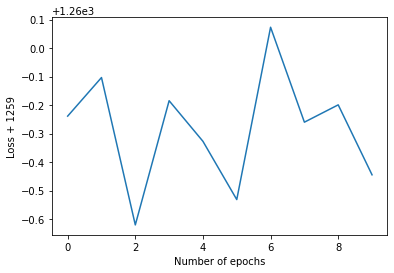

In [21]:
import matplotlib.pyplot as plt
plt.plot(results_df['train loss'])
plt.ylabel('Loss + 1259')
plt.xlabel('Number of epochs')

In [24]:
bleu = []
model.eval()
test_data = sorted(test_data, key=len)
for inputs, labels in test_data:
  inputs = tokenizer_pegasus.encode(inputs, truncation=True, return_tensors="pt").to(torch_device)
  target = tokenizer_pegasus.encode(labels, max_length=100, truncation=True, return_tensors="pt").to(torch_device)
  # print(inputs)
  # print(target)
  len_labels = target.shape[1]
  preds = model.generate(inputs, max_length=len_labels)
  decoded_preds = tokenizer_pegasus.batch_decode(preds, skip_special_tokens=True)
  decoded_target = tokenizer_pegasus.batch_decode(target, skip_special_tokens=True)
  bleu.append(sentence_bleu(tokenize_words(decoded_preds[0]),tokenize_words(decoded_target[0])))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [25]:
rand = tokenizer_pegasus.encode(test_data[40][0], truncation=True, return_tensors="pt").to(torch_device)
preds = model.generate(rand, max_length=100)
decoded_preds = tokenizer_pegasus.batch_decode(preds, skip_special_tokens=True)

In [26]:
decoded_preds[0]

'the aim of this paper is to deal with constraints that are needed to develop a based on unification grammar so that our parser can deal with some types of sentences in variety. <n> the main result is the following. <n> _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ '

In [27]:
import re
a = test_data[40][0]
articles_processed = re.sub(re.compile('<.*?>'),'',a)
articles_processed = re.sub('[^A-Za-z0-9]+',' ',articles_processed)
articles_processed = articles_processed.lower()
articles_processed

' introduction our aim is to formalize constraints that are needed to develop a parser based on unification grammar called ug henceforth so that our parser can deal with variety of types of sentences in japanese however just parsing syntactically is not enough for natural language understanding one important and necessary task to be done when a parser processes a discourse in japanese is the so called zero anaphora resolution all of syntactic semantic and pragmatic constraints are to be involved to resolve zero anaphora of course some of omitted pronouns are syntactically resolved for instance vp with suffix te is not regarded as a clause but a conjunct vp therefore the subject of the vp with te which is possibly omitted from surface should corefer with the subject of the sentence one example is hanako felt cold and closed the window where both of zero subjects and refer to the sentential topic hanako in this example one of the possible accounts for this interpretation is the following

In [28]:
bleu_1 = []
from gensim.summarization import summarize
for inputs, labels in test_data:
  label_tok = tokenize_words(labels)
  s = summarize(inputs, len(label_tok))
  input_tok = tokenize_words(s)
  bleu_1.append(sentence_bleu(input_tok,label_tok))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 

In [29]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

In [30]:
model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

In [31]:
bleu_2 = []
for inputs, labels in test_data:
  preprocess_text = inputs.strip().replace("\n","")
  t5_prepared_Text = "summarize: "+preprocess_text
  tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt",max_length=2048).to(device)
  tok_label = tokenize_words(labels)
  summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=len(tok_label)-25,
                                    max_length=len(tok_label)+25,
                                    early_stopping=True)
  output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  output_tok = tokenize_words(output)
  bleu_2.append(sentence_bleu(output_tok,tok_label))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [32]:
preprocess_text = a.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt",max_length=2048).to(device)
summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=50,
                                    max_length=60,
                                    early_stopping=True)
output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
output

"u.s. linguists have proposed a 'conjunctive particle' in the main clause. the subordinate clause is the subject of the VP withsuffix te, which is possibly omitted from surface, or pro"

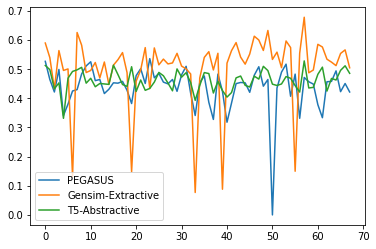

In [33]:
result = pd.DataFrame({'PEGASUS':bleu,'Gensim-Extractive':bleu_1,'T5-Abstractive':bleu_2})
result.plot()

In [34]:
result['PEGASUS'].mean()

0.43807729335840623

Text(0, 0.5, 'BLEU Score')

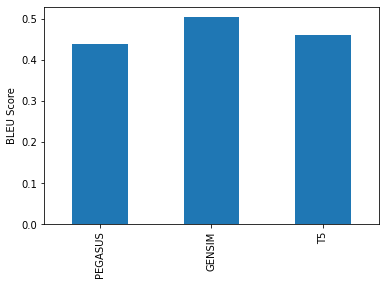

In [35]:
updated_result = pd.DataFrame([result['PEGASUS'].mean(),result['Gensim-Extractive'].mean(),result['T5-Abstractive'].mean()],index=['PEGASUS','GENSIM','T5'])
updated_result.plot.bar(legend=None)
plt.ylabel('BLEU Score')
# plt.get_legend().remove()

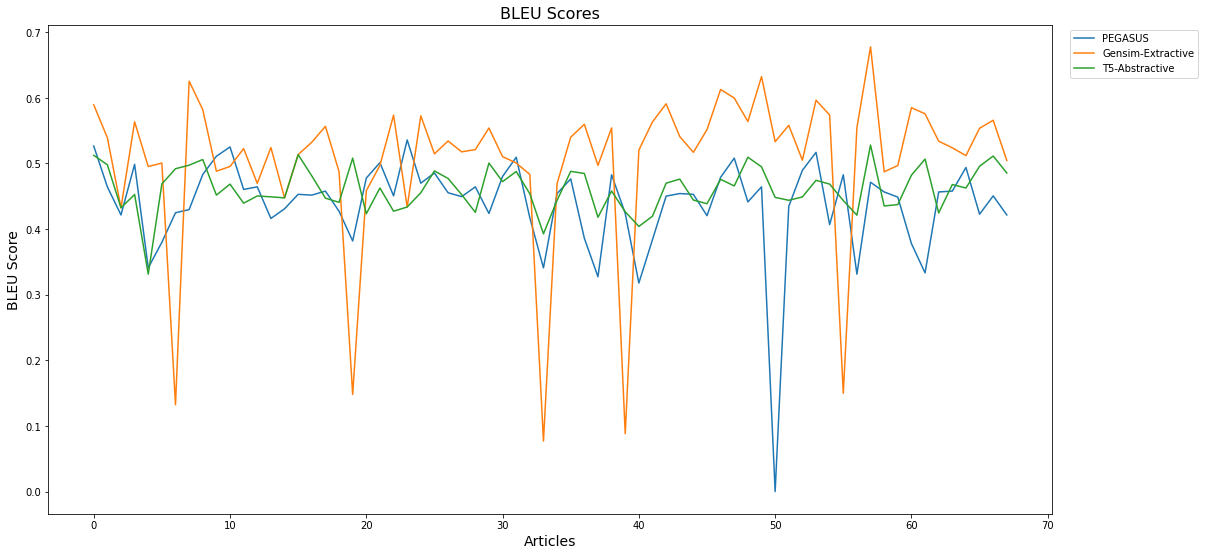

In [36]:
result.plot()
fig=plt.gcf()
fig.set_size_inches(18,9)
_=plt.legend(bbox_to_anchor=(1.15,1),loc='upper right')
_=fig=plt.title('BLEU Scores',fontsize=16)
_=fig=plt.xlabel('Articles',fontsize=14)
_=fig=plt.ylabel('BLEU Score',fontsize=14)